<a href="https://colab.research.google.com/github/Kasi-redddy/00_pytorch_fundamentals/blob/main/02_pytorch_classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with PyTorch.


A classification problem involves predicting whether something is one thing or another.

## 1. Make classification data and get it ready.

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles


# make 1000 samples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)



In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
#make Dataframe of circle
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


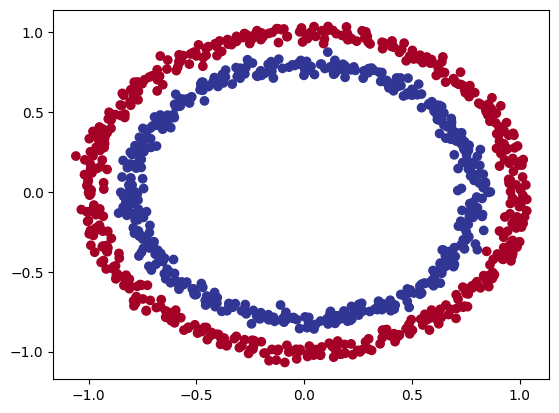

In [7]:
#Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x= X[:, 0],
            y= X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu)

**Note**: This dataset is often what's considered a **toy problem** (a problem that's used to try and test things out on) in machine learning.

## 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
#view the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]


print(f"values for one sample of X:{X_sample} and the same for y: {y_sample}")
print(f"shapes for one sample of X:{X_sample.shape} and rhe same for y: {y_sample.shape}")

values for one sample of X:[0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X:(2,) and rhe same for y: ()


## 1.2 Turn data into tensors and create train and test splits.

In [11]:
import torch
torch.__version__

'2.5.0+cu121'

In [12]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
# Import torch if not already imported
import torch

# Check if X is already a tensor
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float)

# Check if y is already a tensor
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float)

# View the first 5 elements to confirm
X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [17]:
n_samples

1000

### 2. Building a model
 Let's build a model to classify our blue and red dots.

 To do so , we want to:


   1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one
   2. Construct a model (by subclassing `nn.module`)
   3. define a loss function and optimizer
   4. Create  a training and test loop

In [18]:
# import PyTorch and nn
import torch
from torch import nn

#Make device agonostic code
device = "cuda" if torch.cuda.is_available() else"cpu"
device

'cpu'

In [19]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [20]:
X_train.shape

torch.Size([800, 2])

Now we have setup device agnostic code, let's code create a model that:

1. Subclass `nn.module` (almost all models in pyTorch subclass `nn.module`)
2. Create 2 `nn.Linear()` layers that capable of handling the shapes of our data.
3. Defines a  `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instaiate an instance of our model class and send it to the target device.

In [21]:
X_train.shape

torch.Size([800, 2])

In [22]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [23]:
#Construct the model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. create 2 nn.linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)


    #3. Define forward () method that outlines the forwars pass
    def forward(self, X):
      return self.layer_2(self.layer_1(X))

#4. Inistiance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
device

'cpu'

In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
#Let's replicate the model above using the nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
). to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4345, -0.3943],
                      [ 0.3084,  0.5347],
                      [ 0.5399, -0.0282],
                      [-0.0400,  0.3723],
                      [ 0.2011,  0.1927]])),
             ('0.bias', tensor([-0.4054, -0.2926,  0.3930, -0.2213, -0.2157])),
             ('1.weight',
              tensor([[-0.2738,  0.0287, -0.0496, -0.4218, -0.4028]])),
             ('1.bias', tensor([0.2619]))])

In [28]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)}, shape:{untrained_preds.shape}")
print(f"Shape of test samples:{len(X_test)}, shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200, shape:torch.Size([200, 1])
Shape of test samples:200, shape:torch.Size([200, 2])

First 10 predictions:
 tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
y_test[:10], X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

# 2.1 Setup loss function and optimizer

Which loss function or optimizer should you see?

Again.. this is a problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy

As a reaminder, the loss function measures hoe *`wrong`* your models predictions are

And for optimizers, two of the most common and useful are SGD and Adam , however PyTorch has many built-in options

In [30]:
 #Set the loss functions
 # loss_fn = nn.BCELoss() # BCELoss = no sigmoid built_in
 loss_fn = nn.BCEWithLogitsLoss() # BECWithLogisticLoss = sigmoid built-in

 optimizer = torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [31]:
# calculate accuracy - out of 100 examples , what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# 3. Train model

To train our model, we're going to need build a training loopwith the following steps :

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits** .

We can convert these **logits**  into
 **prediction probabilities**  by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).



Then we can convert our model's prediction to **prediction labels** by either rounding them or taking the `argmax()`

In [32]:
device  # we have ran out of GPU , if you want gpu for longtime we need to take subspricttion

'cpu'

In [33]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits


tensor([[0.5256],
        [0.4166],
        [0.7010],
        [0.4763],
        [0.5260]])

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [35]:
#use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6284],
        [0.6027],
        [0.6684],
        [0.6169],
        [0.6286]])

For our prediction probability values , we need to perform a range-style rounding on them:

* `y_pred_probs` >= 0.5. `y=1`(class 1)
*  `y_pred_probs` < 0.5  `y=0`(class 0)

In [36]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#check for equality     # squeeze is used to get rid of extra dimension
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

In [37]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# 3.2 Building a training and testing loop

In [38]:
import torch

# Set random seed for reproducibility
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on the target device (assuming 'device' is already defined)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Ensure loss function and optimizer are defined
loss_fn = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for binary classification
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)  # Define optimizer with a learning rate

# Define an accuracy function (assuming binary classification)
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()
    accuracy = (correct / len(y_true)) * 100
    return accuracy

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # Turn logits -> probabilities -> labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)  # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Optimize
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate loss and accuracy for the test set
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

        # Print epoch metrics every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.73104, Acc: 50.00% | Test Loss: 0.72136, Test Acc: 50.00%
Epoch: 10 | Loss: 0.70908, Acc: 50.00% | Test Loss: 0.70309, Test Acc: 50.00%
Epoch: 20 | Loss: 0.70040, Acc: 50.00% | Test Loss: 0.69621, Test Acc: 50.00%
Epoch: 30 | Loss: 0.69679, Acc: 56.00% | Test Loss: 0.69362, Test Acc: 60.00%
Epoch: 40 | Loss: 0.69520, Acc: 53.25% | Test Loss: 0.69269, Test Acc: 57.00%
Epoch: 50 | Loss: 0.69444, Acc: 52.00% | Test Loss: 0.69241, Test Acc: 50.00%
Epoch: 60 | Loss: 0.69404, Acc: 51.62% | Test Loss: 0.69239, Test Acc: 50.50%
Epoch: 70 | Loss: 0.69380, Acc: 51.12% | Test Loss: 0.69247, Test Acc: 49.50%
Epoch: 80 | Loss: 0.69364, Acc: 50.25% | Test Loss: 0.69259, Test Acc: 50.00%
Epoch: 90 | Loss: 0.69352, Acc: 49.88% | Test Loss: 0.69271, Test Acc: 50.00%


# Make preedictions and evaluate the model

From the metrics it looks like our model isn't learning anything

So to inspect it let's make some predictions and make them visual..

Means **visualize**

In [39]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

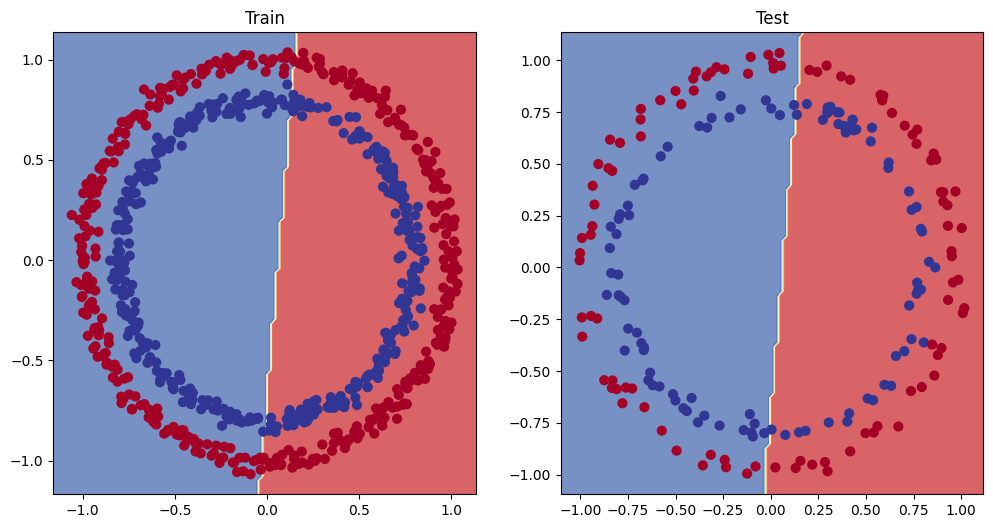

In [40]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving a model (From a model perspective)

* Add more layers- give the model more chances to learn about patterns in the data.

* Add more hidden units - go from 5 hidden units to 10 hidden units.

* Fit for longer
* Changing the activation functions
* Change the learing rate
* Change the function


These options are all from  a model's perspective because they deal directly with the model, rather than the data.


And because these options are all values we(as a machine lerning engineers and data scientists) can change, they are reffered as **hyperparameters**.

Let's try and improve our model by:

* Adding more hidden layers units: 5->10
* Increase the number of layers : 2->3
* Increase the number of epochs: 100-> 1000

In [41]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4087, -0.4113],
                      [ 0.3272,  0.5463],
                      [ 0.5267, -0.0366],
                      [-0.0914,  0.3389],
                      [ 0.1533,  0.1616]])),
             ('0.bias', tensor([-0.3447, -0.3192,  0.4170, -0.1122, -0.1130])),
             ('1.weight',
              tensor([[-0.1472,  0.2050, -0.0921, -0.3526, -0.3168]])),
             ('1.bias', tensor([-0.0187]))])

In [42]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


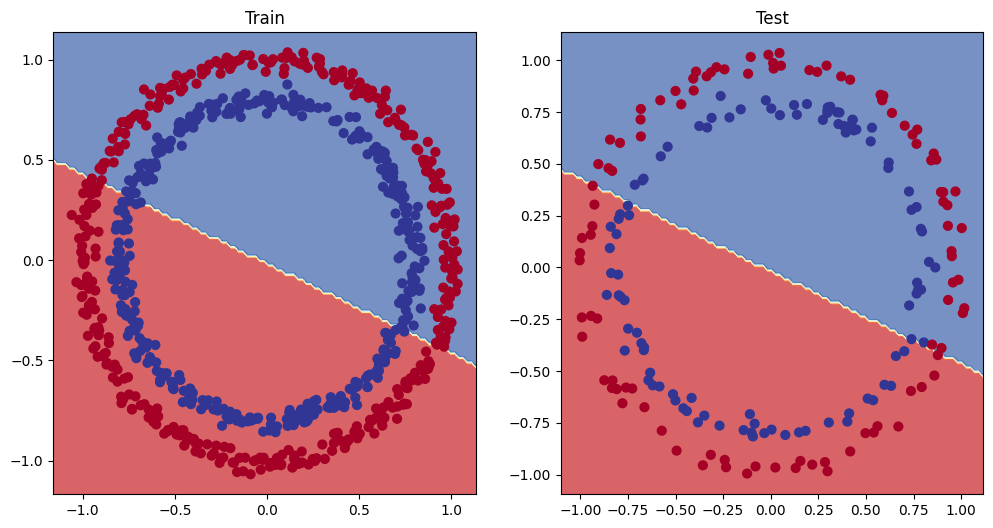

In [45]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# 5.1 Preparing data t see if our model can fit a staright line..

One way to troubleshoot to a larger problem to test our smaller problem

In [46]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [47]:

# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


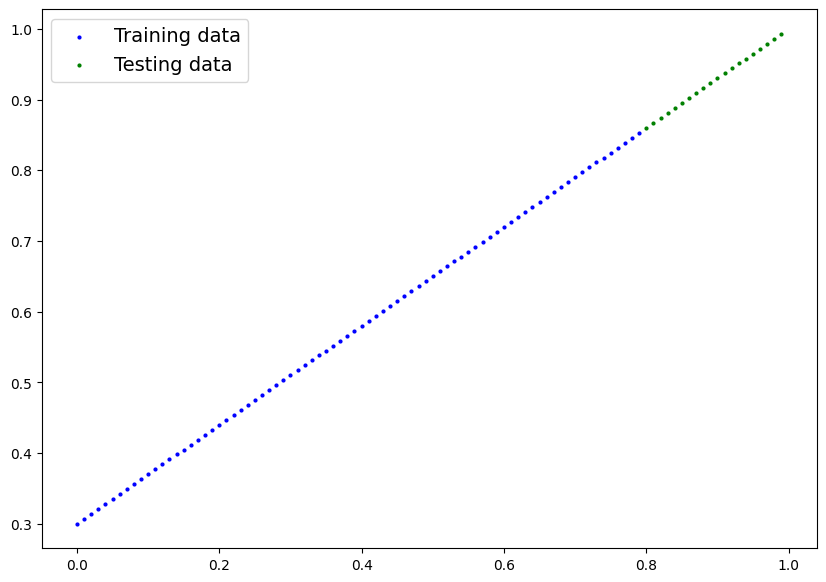

In [48]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [49]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

# 5.2 Adjusting `model_1` to fit a staright line

In [50]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10, bias=True),  # First layer
    nn.Linear(in_features=10, out_features=10, bias=True),  # Second layer should match the output of the first layer
    nn.Linear(in_features=10, out_features=1, bias=True)   # Output layer
)


In [51]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

In [52]:
# Ensure model and data are on the same device
model_2 = model_2.to(device)
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Train the model
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_2.train()  # Set model to training mode

    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


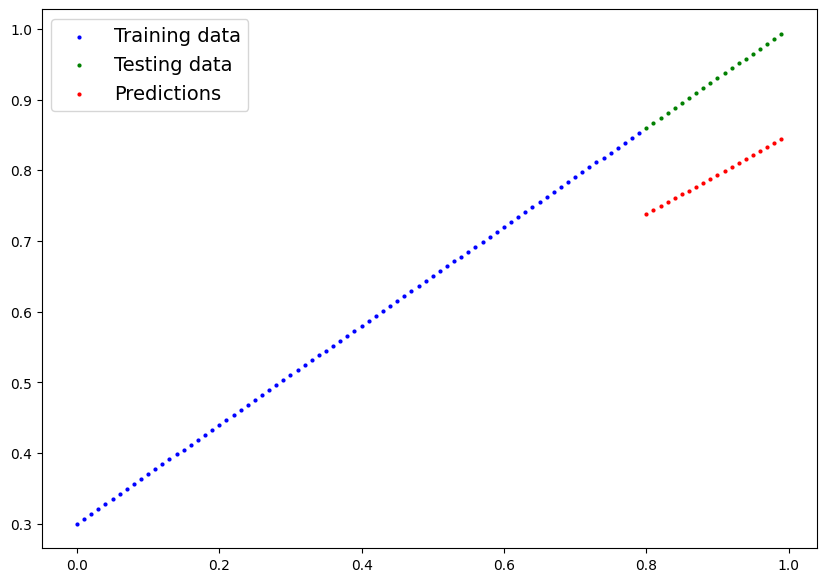

In [53]:
# Turn on evaluation
model_2.eval()

#make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot and predict data
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels = y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());




# 6.The missing piece: non-**linearity**


"What patterns could you draw if you are given an infinite amount of staright and non-linear function?"

Or in ML terms, an infinite (but relly finite) of linear and non-linear function?**bold text**

# 6.1 Recreating non-linear data (red and blue circles)

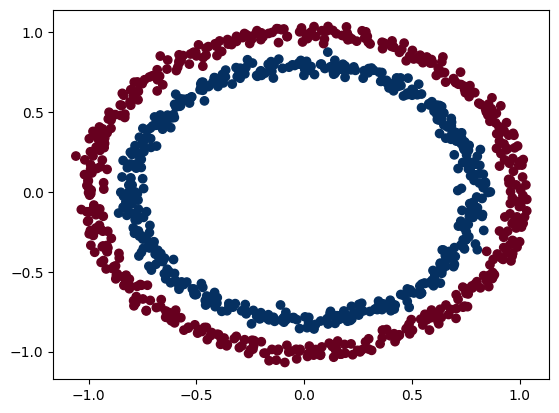

In [54]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [55]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# 6.2  Building a model  with Non-Linearity

* Linear = staright line

* Non-Linear = non-staright line



In [56]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is non-linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [58]:
# Set up loss and optimizer   # we can this in "Tensorflow playground as like real."
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

## 6.3 Training a model with non-linerity


In [66]:
import torch

# Set the manual seed for reproducibility
torch.manual_seed(42)
epochs = 1000

# Ensure data is on the target device (GPU or CPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_3.train()  # Set model to training mode

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)  # Use logits for BCEWithLogitsLoss
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()  # Set model to evaluation mode
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))  # logits -> prediction probabilities -> prediction labels

        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.00765, Accuracy: 100.00% | Test Loss: 0.01993, Test Accuracy: 99.50%
Epoch: 100 | Loss: 0.00745, Accuracy: 100.00% | Test Loss: 0.01962, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.00726, Accuracy: 100.00% | Test Loss: 0.01928, Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.00708, Accuracy: 100.00% | Test Loss: 0.01896, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.00690, Accuracy: 100.00% | Test Loss: 0.01866, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.00674, Accuracy: 100.00% | Test Loss: 0.01841, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.00658, Accuracy: 100.00% | Test Loss: 0.01816, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.00643, Accuracy: 100.00% | Test Loss: 0.01792, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.00629, Accuracy: 100.00% | Test Loss: 0.01770, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.00616, Accuracy: 100.00% | Test Loss: 0.01748, Test Accuracy: 99.50%


#  6.4  Evaluating a model trained with non_linear activation function



In [67]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))). squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

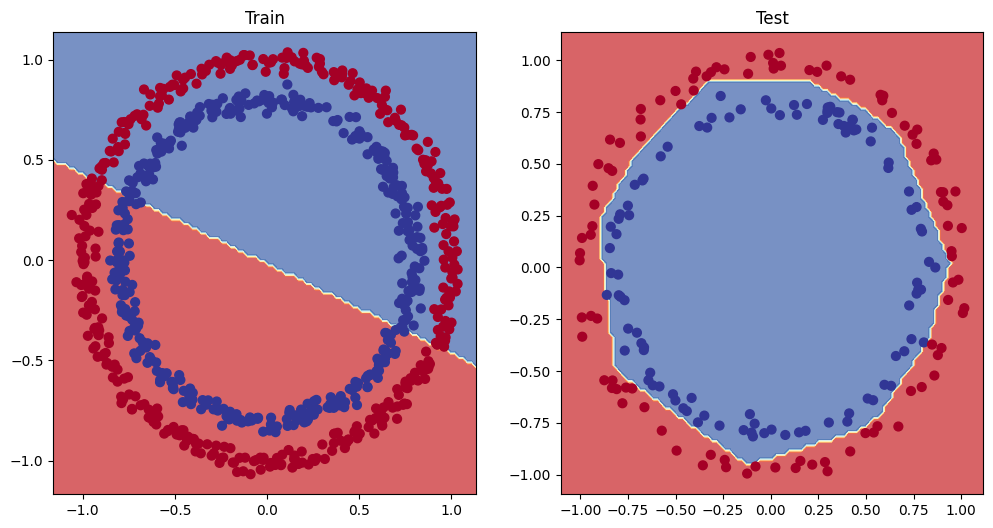

In [68]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


# 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give tools to discover patterns in data and it tries to figure out the patterns on its own.

And this tools are linear & non-linear functions


In [69]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [70]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

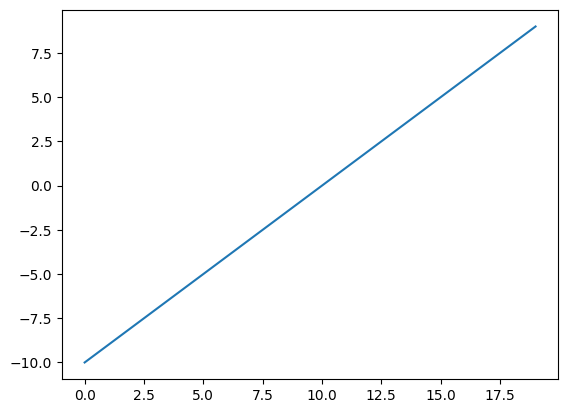

In [76]:
plt.plot(A)

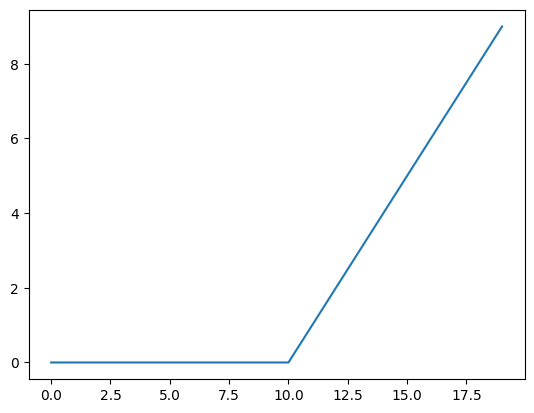

In [77]:
plt.plot(torch.relu(A))

In [79]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [78]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)  # input must be tesnsors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

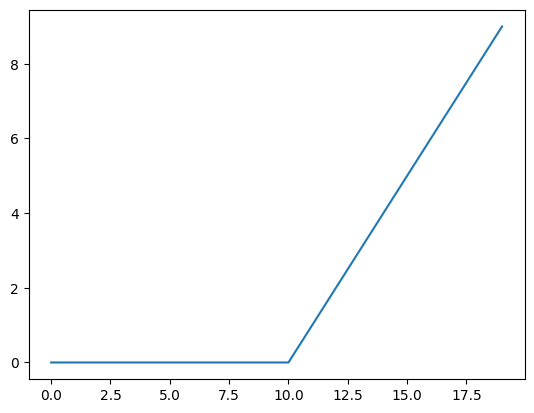

In [80]:
# relu plot
plt.plot(relu(A))

In [82]:
# Let's do for sigmoid
def sigmoid(x):
  return 1/(1 +torch.exp(-x))

sigmoid(A)


tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

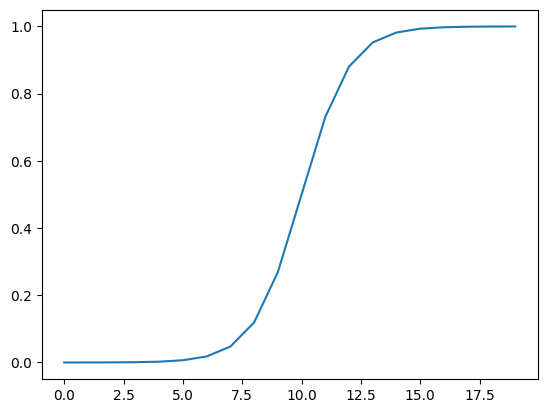

In [83]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A))

### 8. Putting it all together with  multi-class classification problem.

* Binary classification  = one thing or another(cat vs dog, spam vs not-spam, fraud or not fraud)

* Multi-class classification = more than one thing or another (cat vs dog vs chicken)



# 8.1   Creating a toy multi-class dataset


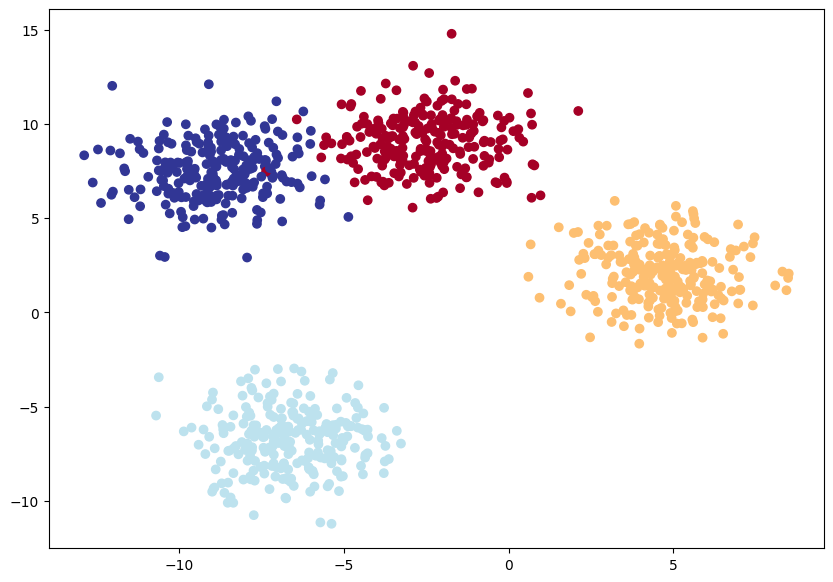

In [84]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters from data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. create multi-class data
X_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state= RANDOM_SEED)

 # 2. Turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state= RANDOM_SEED )

#plot data (visualize, visualize and visualize)
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)






# 8.2   Building a multi-class classification model in PyTorch



In [86]:
# I have run out of GPU time so if you have GPU you can use GPU.
device = "cuda"  if torch.cuda.is_available() else "cpu"
device

'cpu'

In [90]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [88]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [89]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

# 8.3   Create a loss function and an optimizer for a multi-class classification model

In [91]:
# Create a loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_4.parameters(),
                            lr=0.1)  #Learning rate.

# 8.4 Getting prediction probabilites for a multi-class PyTorch model


In [97]:
# raw outputs(logits)
model_4(X_blob_train.to(device))[:10]

tensor([[ 0.8696, -0.7083, -0.3200,  0.5513],
        [-0.1989, -2.0320,  0.4267, -1.2864],
        [-0.9819, -0.0741,  1.0288, -1.7247],
        [-0.6449, -0.4877,  0.7777, -1.4029],
        [-0.2937, -1.7872,  0.4998, -1.3371],
        [ 0.2734, -1.5766,  0.0943, -0.5144],
        [-0.4303, -2.2081,  0.5906, -1.6502],
        [ 0.7027, -0.6989, -0.1993,  0.3313],
        [-0.8852, -1.8593,  0.9256, -2.1495],
        [-0.3521, -1.9831,  0.5383, -1.4760]], grad_fn=<SliceBackward0>)

In [98]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [99]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.8161, -0.8846, -0.2847,  0.4252],
        [-0.9359, -2.0669,  0.9583, -2.2816],
        [-0.6742, -0.0694,  0.8067, -1.3123],
        [ 0.6858, -0.5307, -0.1840,  0.3610],
        [ 0.1430, -1.9414,  0.1816, -0.8017]], grad_fn=<SliceBackward0>)
tensor([[0.4563, 0.0833, 0.1518, 0.3087],
        [0.1215, 0.0392, 0.8077, 0.0316],
        [0.1289, 0.2361, 0.5669, 0.0681],
        [0.4102, 0.1215, 0.1719, 0.2964],
        [0.3918, 0.0487, 0.4072, 0.1523]], grad_fn=<SliceBackward0>)


In [100]:
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

In [104]:
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred

tensor([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
        2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 0, 2, 0])

In [105]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

 # 8.5 Creating a training and testing loop for a multi-class PyTorch model

In [109]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Move data to the target device (CPU or GPU) and ensure labels are in the correct data type (Long)
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device).long()
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device).long()

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train)  # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # go from logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        # 2. Calculate test loss and accuracy
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    # Print out progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.92116, Acc: 26.00% | Test Loss: 0.85459, Test Acc: 55.00%
Epoch: 10 | Loss: 0.28521, Acc: 97.12% | Test Loss: 0.23787, Test Acc: 98.00%
Epoch: 20 | Loss: 0.11618, Acc: 99.00% | Test Loss: 0.10434, Test Acc: 98.50%
Epoch: 30 | Loss: 0.07650, Acc: 99.00% | Test Loss: 0.06791, Test Acc: 98.50%
Epoch: 40 | Loss: 0.06006, Acc: 99.00% | Test Loss: 0.05209, Test Acc: 99.00%
Epoch: 50 | Loss: 0.05133, Acc: 99.00% | Test Loss: 0.04346, Test Acc: 99.00%
Epoch: 60 | Loss: 0.04599, Acc: 99.00% | Test Loss: 0.03807, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04242, Acc: 99.00% | Test Loss: 0.03440, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03989, Acc: 99.00% | Test Loss: 0.03174, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03800, Acc: 99.00% | Test Loss: 0.02972, Test Acc: 99.50%


# 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [111]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  9.0456,  15.0193,  -8.9350,  -4.0027],
        [ -0.7123, -18.4017,  -2.2680,   4.8906],
        [-13.7129, -24.1734,  13.9078,   5.7032],
        [  4.8120,   9.9222,  -4.2728,  -2.8219],
        [ 10.0808,   5.7406, -12.0556,  -1.2943],
        [ -1.4195, -22.5796,  -2.1152,   6.0351],
        [-12.6774, -19.5705,  13.3991,   4.4586],
        [  7.0078,  -0.7074,  -9.1888,   0.3454],
        [-16.1919, -32.0740,  15.7126,   7.7945],
        [  7.9838,   1.6031, -10.0499,  -0.2502]])

In [112]:
# Go to logits -> Predictions probabilities
y_pred_probs = torch.softmax(y_logits, dim =1)
y_pred_probs[:10]

tensor([[2.5385e-03, 9.9746e-01, 3.9417e-11, 5.4671e-09],
        [3.6707e-03, 7.6268e-11, 7.7468e-04, 9.9555e-01],
        [1.0101e-12, 2.8937e-17, 9.9973e-01, 2.7332e-04],
        [5.9982e-03, 9.9400e-01, 6.8008e-07, 2.9020e-06],
        [9.8712e-01, 1.2865e-02, 2.4023e-10, 1.1330e-05],
        [5.7827e-04, 3.7360e-13, 2.8838e-04, 9.9913e-01],
        [4.7321e-12, 4.8021e-15, 9.9987e-01, 1.3096e-04],
        [9.9828e-01, 4.4521e-04, 9.2289e-08, 1.2759e-03],
        [1.3927e-14, 1.7634e-21, 9.9964e-01, 3.6396e-04],
        [9.9804e-01, 1.6906e-03, 1.4696e-08, 2.6495e-04]])

In [114]:
# Go from prob to pred labels
y_preds = y_pred_probs.argmax(dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [115]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

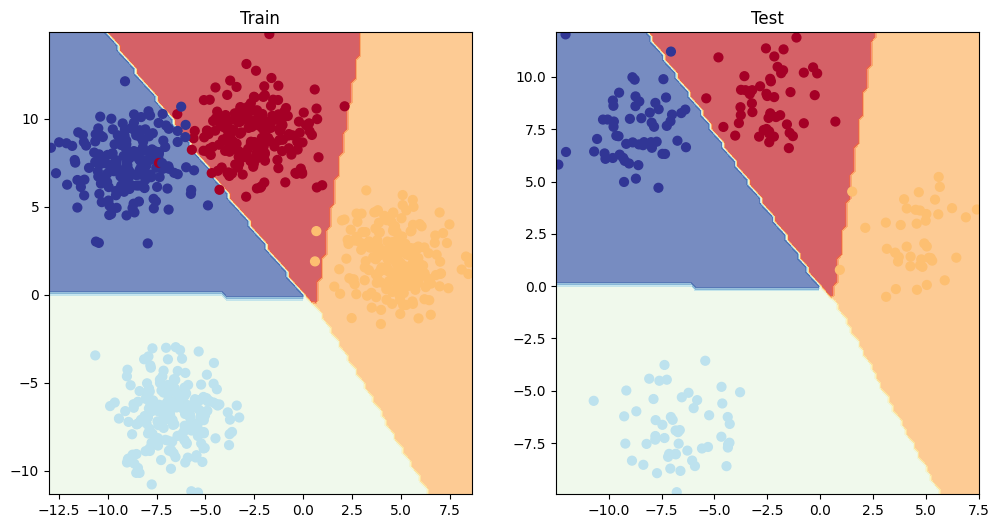

In [117]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [118]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 18.2 MB/s eta 0:00:00


In [119]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)


tensor(0.9950)